In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter
from scipy import interpolate as interp
from scipy import linalg
from scipy import optimize

plt.rc('text',usetex=True)
plt.rc('font', size=40)
plt.rc('font', weight='bold')
plt.rc('font', family='serif')          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.rc('ytick', direction='in')
plt.rc('xtick', direction='in')
plt.rc('xtick.major',size=10)
plt.rc('ytick.major',size=10)
plt.rc('xtick.minor',size=5)
plt.rc('ytick.minor',size=5)

In [2]:
days_per_yr = 365.25
sec_per_year = 365.25*60.*60.*24.
days_per_year = 365.25
sec_per_day = 60.*60.*24.

In [3]:
def sumq(f, fqp, sig, lam, N=10):
    
    sq = np.zeros_like(f)
    for k in range(1, N+1):
        
        sq += np.exp(-(k - 1) / lam) * np.exp(-(f - fqp * k) ** 2 / (2 * (k * sig * fqp) ** 2)) / k
        
    return sq

In [4]:
fqp0=10**(-0.111); sigma0=0.047; lambda0=0.7; Rqp0=10**(2.7); Apl0 = 10**(-9.41); gamma0 = 4.3    # B1828-11 values

In [5]:
Nf = 100
Tspan = 20 #yr
f = np.arange(1,2*Nf+1) /Tspan/2

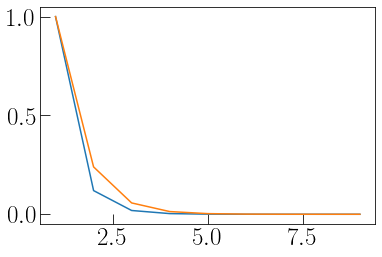

In [6]:
j=np.arange(1,10)
    
plt.plot(j, np.exp(-(j-1)/lambda0)/j)
plt.plot(j, np.exp(-(j-1)/lambda0))

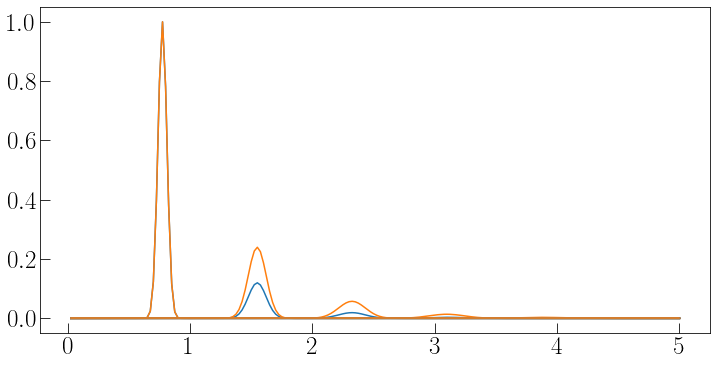

In [7]:
plt.figure(figsize=(12,6))
for j in range(1,10):
    sj = np.exp(-(j-1)/lambda0)/j * np.exp(-(f - fqp0 * j) ** 2 / (2 * (j * sigma0 * fqp0) ** 2))
    plt.plot(f, np.exp(-(j-1)/lambda0)/j * np.exp(-(f - fqp0 * j) ** 2 / (2 * (j * sigma0 * fqp0) ** 2)), \
            color='tab:blue')
    plt.plot(f, np.exp(-(j-1)/lambda0) * np.exp(-(f - fqp0 * j) ** 2 / (2 * (j * sigma0 * fqp0) ** 2)), \
            color='tab:orange')

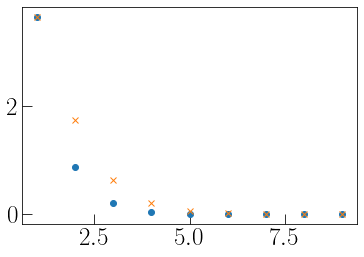

In [8]:
for j in range(1,10):

    sj = np.exp(-(j-1)/lambda0)/j * np.exp(-(f - fqp0 * j) ** 2 / (2 * (j * sigma0 * fqp0) ** 2))
    plt.plot(j, np.sum(sj), marker='o', c='tab:blue')
    plt.plot(j, np.sum(sj*j), marker='x', c='tab:orange')
    plt.plot(j, np.exp(-(j-1)))

0.7744617978025188 0.047 0.7


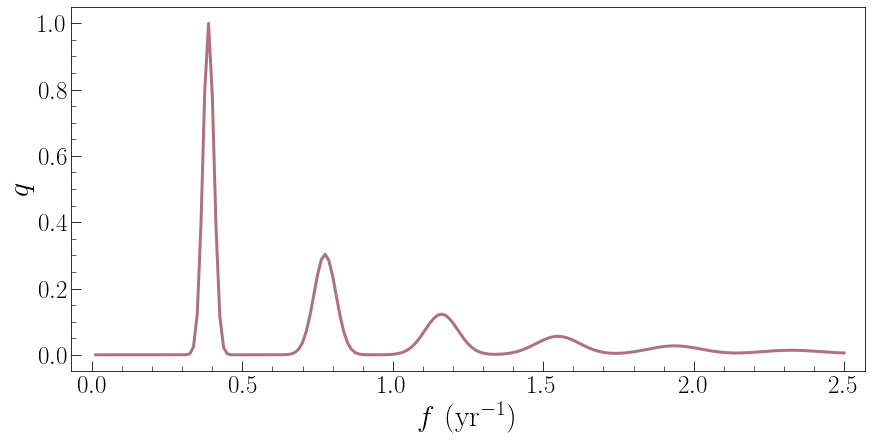

In [10]:
Nf = 100
Tspan = 20 #yr
f_forq = np.arange(1,2*Nf+1) /Tspan/4
plt.figure(figsize=(12, 6), constrained_layout=True)

plt.plot(f_forq, sumq(f_forq, fqp=fqp0/2, sig=sigma0, lam=2), linewidth=3, c='xkcd:mauve')
# plt.plot(f, sq * f**(-4))
plt.ylabel('$q$', fontsize=30)
plt.xlabel('$f$ (yr$^{-1}$)', fontsize=30)
print(fqp0, sigma0, lambda0)
plt.minorticks_on()
# plt.tick_params(axis='y', which='major', pad=5)
# plt.tick_params(axis='x', which='minor', bottom=False)
plt.xlim(-0.07, 2.57)
# plt.savefig('q_vs_f.pdf')
plt.show()

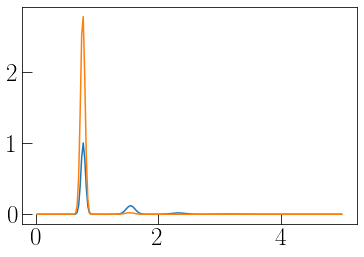

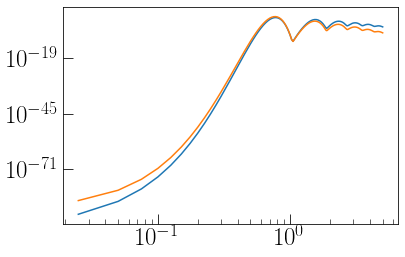

In [10]:
sq = sumq(f, fqp=fqp0, sig=sigma0, lam=lambda0)
plt.plot(f, sq)
plt.plot(f, sq * f**(-4))
plt.show()
plt.figure()
plt.loglog(f, sq)
plt.loglog(f, sq * f**(-4))
plt.show()


In [11]:
def Ppl(f, Apl, gamma):
    
    return Apl*Apl/12/np.pi/np.pi * (f)**(-gamma)
    

def Pqp(f, Rqp, Apl, gamma, fqp, sigma, lamda, N):
    
    Ppl0 = Ppl(f, Apl, gamma)
    
    Ppl0_fqp = Ppl(fqp, Apl, gamma)
#     print(Ppl0_fqp)
    
    sumq0 = sumq(f, fqp, sigma, lamda, N)
#     print(sumq0)
    fcut = 1/2 * fqp*(1- np.sqrt(1 - 16*sigma**2))
#     print(fcut)
    Pqp0 = np.zeros_like(f)
#     print(Pqp)
    for i, fi in enumerate(f):
#         print(i, fi)
        if fi >= fcut:
#             print(fi)
            Pqp0[i] = Rqp * Ppl0_fqp * sumq0[i] * (fi/fqp)**(-4)
    
    return Ppl0, Pqp0


Apl:  3.8904514499428046e-10 , gamma:  4.3 , Rqp:  501.18723362727246 , fqp:  0.7744617978025188 yr-1, sigma:  0.047 , lambda:  0.7


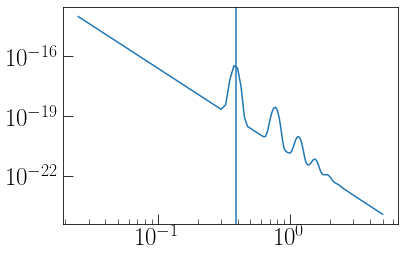

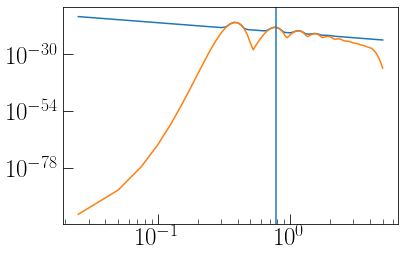

In [12]:
Ppl0, Pqp0 = Pqp(f, Rqp=Rqp0, Apl=Apl0, gamma=gamma0, fqp=fqp0/2, sigma=sigma0, lamda=lambda0, N=10)

print('Apl: ',Apl0, ', gamma: ', gamma0, ', Rqp: ', Rqp0, ', fqp: ', fqp0, 'yr-1, sigma: ', \
      sigma0, ', lambda: ', lambda0)
plt.figure()
plt.loglog(f, Pqp0 + Ppl0)
plt.axvline((fqp0/2))
plt.show()

plt.figure()
plt.loglog(f, Pqp0 + Ppl0)
plt.loglog(f, Pqp0)
plt.axvline((fqp0))
plt.show()


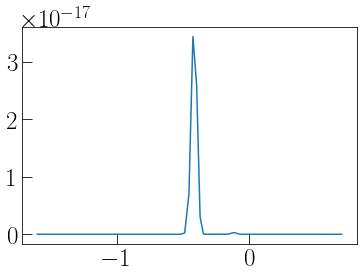

In [13]:
plt.figure()
plt.plot(np.log10(f), Pqp0)
# plt.axvline((fqp))
plt.show()

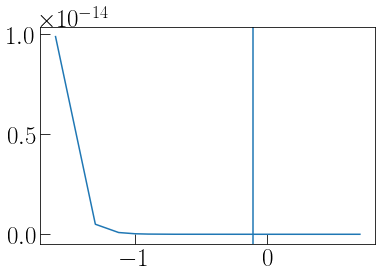

In [14]:
plt.figure()
plt.plot(np.log10(f), Ppl0)
plt.axvline(np.log10(fqp0))
plt.show()

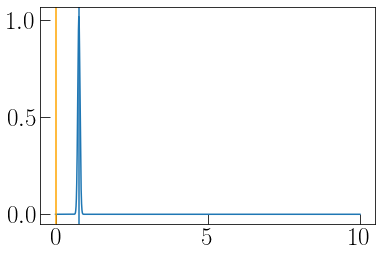

In [15]:
f1 = np.arange(1, 10000)/1000
sq1 = sumq(f1, fqp=fqp0, sig=sigma0, lam=lambda0, N=1)
plt.figure()
plt.plot(f1, sq1 * (f1/fqp0)**(-4))
plt.axvline(0.5*(fqp0 - np.sqrt(fqp0**2 - 16*sigma0**2*fqp0**2)), c='orange')
plt.axvline(0.5*(fqp0 + np.sqrt(fqp0**2 - 16*sigma0**2*fqp0**2)))

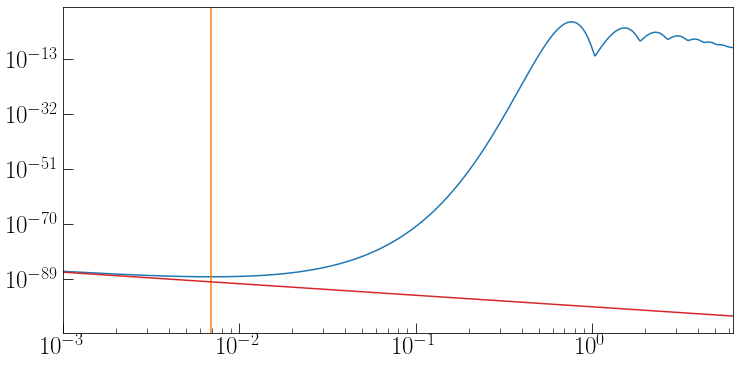

In [16]:
f1 = np.arange(1, 10000)/1000
sq1 = sumq(f1, fqp=fqp0, sig=sigma0, lam=lambda0, N=1)
sq10 = sumq(f1, fqp=fqp0, sig=sigma0, lam=lambda0, N=10)

plt.figure(figsize=(12,6))
# plt.loglog(f1, sq1 * (f1/fqp0)**(-4))
plt.loglog(f1, sq10 * (f1/fqp0)**(-4), c='tab:blue')
plt.axvline(0.5*(fqp0 - np.sqrt(fqp0**2 - 16*sigma0**2*fqp0**2)), c='tab:orange')
# plt.axvline(0.5*(fqp0 + np.sqrt(fqp0**2 - 16*sigma0**2*fqp0**2)))
plt.xlim(10**-3, 10**0.8)
plt.loglog(f1, np.exp(-(fqp0) ** 2 / (2 * (sigma0 * fqp0) ** 2))*(f1/fqp0)**(-4), c='tab:red')
plt.show()

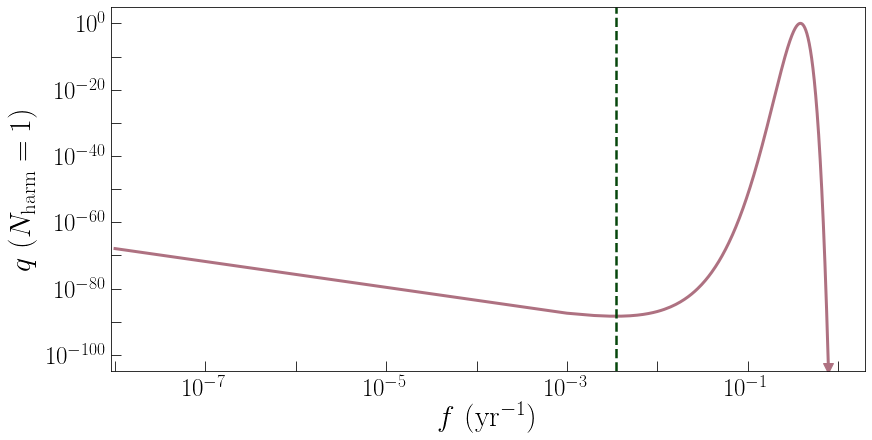

In [17]:
f1 = np.arange(1e-5, 1e4)/1e3
sq1 = sumq(f1, fqp=fqp0/2, sig=sigma0, lam=lambda0, N=1)

fig, ax = plt.subplots(1, 1, figsize=(12,6), constrained_layout=True)
# plt.loglog(f1, sq1 * (f1/fqp0)**(-4))
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(f1, sq1 * (f1/(fqp0/2))**(-4), c='xkcd:mauve', linewidth=3)
ax.axvline(0.5*(fqp0/2 - np.sqrt((fqp0/2)**2 - 16*sigma0**2*(fqp0/2)**2)), c='xkcd:forest green', ls='--', linewidth=2.5)
ax.set_ylim(1e-105, 1e5)
ax.set_xlim(0.9e-8, 2)
# plt.minorticks_on()
ax.tick_params(axis='x', which='both', pad=7)
ax.set_yticks([1e-100, 1e-90, 1e-80, 1e-70, 1e-60, 1e-50, 1e-40, 1e-30, 1e-20, 1e-10, 1])#, minor=True)
ax.set_yticklabels(['$10^{-100}$', '', '$10^{-80}$', '', '$10^{-60}$', '', '$10^{-40}$', '', '$10^{-20}$', '', '$10^0$'])
ax.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
ax.set_xticklabels(['', '$10^{-7}$', '', '$10^{-5}$', '', '$10^{-3}$', '', '$10^{-1}$', ''])

# ax.set_yticks([0.00, 0.05, 0.1], minor=True)
# ax.tick_params(axis='y', which='minor')
# ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1e"))
# ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('$q$ ($N_\mathrm{harm} = 1$)', labelpad=10)
ax.set_xlabel('$f$ (yr$^{-1}$)', labelpad=0.5)
# plt.loglog()
ax.plot(fqp0, 10e-105, marker='v', c='xkcd:mauve', markersize=10)

# plt.savefig('Pqp_fcut.pdf')
plt.show()

Apl:  3.8904514499428046e-10 , gamma:  4.3 , Rqp:  501.18723362727246 , fqp:  0.3872308989012594 yr-1, sigma:  0.047 , lambda:  0.7


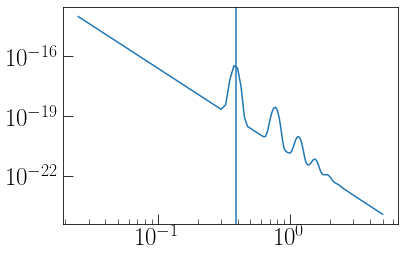

In [18]:
Ppl0, Pqp0 = Pqp(f, Rqp=Rqp0, Apl=Apl0, gamma=gamma0, fqp=fqp0/2, sigma=sigma0, lamda=lambda0, N=10)

print('Apl: ',Apl0, ', gamma: ', gamma0, ', Rqp: ', Rqp0, ', fqp: ', fqp0/2, 'yr-1, sigma: ', \
      sigma0, ', lambda: ', lambda0)
plt.figure()
plt.loglog(f, Pqp0 + Ppl0)
plt.axvline((fqp0/2))
plt.show()

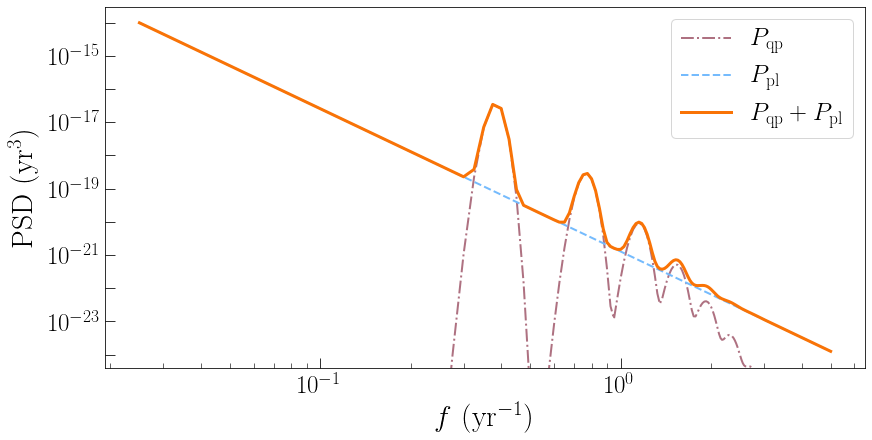

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12,6), constrained_layout=True)
# plt.loglog(f1, sq1 * (f1/fqp0)**(-4))
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(f, Pqp0, c='xkcd:mauve', linewidth=2, ls='-.', label='$P_\mathrm{qp}$')
ax.plot(f, Ppl0, c='xkcd:sky blue', linewidth=2, ls='--',  label='$P_\mathrm{pl}$')
ax.plot(f, Pqp0 + Ppl0, c='xkcd:orange', linewidth=3, label='$P_\mathrm{qp} + P_\mathrm{pl}$')

ax.legend(loc='upper right', fontsize=25)
# ax.axvline(0.5*(fqp0 - np.sqrt(fqp0**2 - 16*sigma0**2*fqp0**2)), c='xkcd:forest green', ls='--', linewidth=2.5)
# ax.set_ylim(1e-105, 1e5)
# ax.set_xlim(0.9e-8, 2)
# plt.minorticks_on()
ax.tick_params(axis='x', which='both', pad=7)
ax.tick_params(axis='y', which='both')

ax.set_yticks([1e-24, 1e-23, 1e-22, 1e-21, 1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14])#, minor=True)
ax.set_yticklabels(['', '$10^{-23}$', '', '$10^{-21}$', '', '$10^{-19}$', '', '$10^{-17}$', '', '$10^{-15}$', ''])
# ax.set_xticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
# ax.set_xticklabels(['', '$10^{-7}$', '', '$10^{-5}$', '', '$10^{-3}$', '', '$10^{-1}$', ''])

# ax.set_yticks([0.00, 0.05, 0.1], minor=True)
# ax.tick_params(axis='y', which='minor')
# ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1e"))
# ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('PSD (yr$^3$)', labelpad=10)
ax.set_xlabel('$f$ (yr$^{-1}$)')
# plt.loglog()
# ax.plot(1.56, 5e-105, marker='v', c='xkcd:mauve', markersize=10)
# print(ax.get_ylim())
ax.set_ylim([4e-25, 3e-14])
# plt.savefig('Ppl_and_Pqp.pdf')
plt.show()

In [20]:
def getCf(times, Rqp, Apl, gamma, fqp, sigma, lamda, N=10):
    # note: 'times' can be irregularly sampled; also negative
#     total_time = 10 *365.25 # days
    total_time = (np.amax(times)-np.amin(times)) # days
#     ndays_time = int(total_time+1)
#     print(ndays_time)
    # create regular sequence of times..
    #.. to include 'times' after the iFFT
    npts_regtimes = len(times) *2
    delta_regtimes = times[1]-times[0] #day
#     while npts_regtimes*delta_regtimes < (ndays_time+1)*2:
#         npts_regtimes *= 2
    print(npts_regtimes)
    # this creates an array of times to use in covFunc...
    # ... regtimes =  [0,1,...,npts_regtimes-1]*delta_regtimes
    # ... in days

    # which then gives the FT frequencies...
    # ... [0,1/npts_regtimes,...,(npts_regtimes/2)/npts_regtimes]]*(1/delta_regtimes)
    # ... in days^-1

    nu = np.fft.rfftfreq(npts_regtimes,delta_regtimes) #day^-1
    # len(nu) == npts_regtimes/2+1
    # delta_nu == 1./(npts_regtimes*delta_regtimes)
    delta_nu = (nu[-1] - nu[0])/nu.shape[0] #day^-1

    # calculate power spectral density
    # psd_nu = PSD(nu, fc_yr, logA, gamma) # yr^3
    Ppl0, Pqp0 = Pqp(nu*days_per_year, Rqp=Rqp, Apl=Apl, gamma=gamma, fqp=fqp, sigma=sigma, lamda=lamda, N=10)
    psd_nu = Pqp0
    # get the covariance function:
    covFunc = np.fft.irfft(psd_nu*sec_per_year**3/(delta_regtimes*sec_per_day)) #sec^2
    # len(covFunc) == (len(nu)-1)*2 == npts_regtimes

    # need covFunc to work for abs(times[j]-times[i]), any j,i
    # ndays_time-1 <max (abs(times[j]-times[i])) =< ndays_time
    print(covFunc.shape, total_time, (times-times[0]).shape, covFunc[:(times-times[0]).shape[0]].shape)
    # so interpolate it for the regular times up to ndays_time:
    covFunc = interp.interp1d(times-times[0], covFunc[:(times-times[0]).shape[0]])
# 
    C = np.empty([len(times),len(times)])
    #alltimes = np.empty([len(times),len(times)])
    for i in range(len(times)):
        try:
            C[i] = covFunc(np.abs(times-times[i]))
            #alltimes[i] = np.abs(times-times[i])
        except ValueError as e:
            print (e)
            print (np.abs(times-times[i]))
    return C, covFunc
    # have covariance matrix!


In [21]:
times = np.arange(50000, 62000, step=10)
times.shape

(1200,)

In [22]:
C, covFunc = getCf(times, Rqp=Rqp0, Apl=Apl0, gamma=gamma0, fqp=fqp0/2, sigma=sigma0, lamda=lambda0, N=10)
 

2400
(2400,) 11990 (1200,) (1200,)


/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
C.shape, covFunc(times-times[0]).shape

((1200, 1200), (1200,))

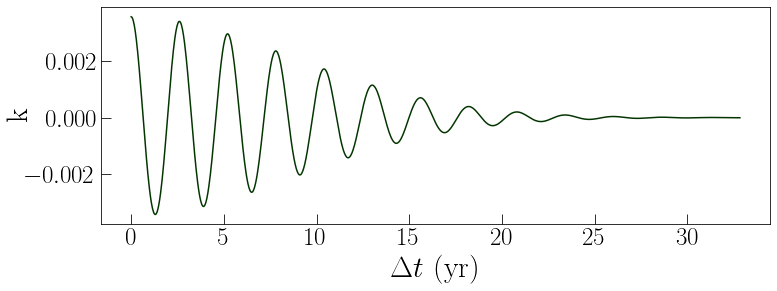

Rqp:  501.18723362727246 , fqp:  0.3872308989012594 yr-1, sigma:  0.047 , lambda:  0.7
1/fqp:  943.2356793746867


In [80]:
fig, ax0 = plt.subplots(1,1, figsize=(12, 4))
ax0.plot((times-times[0])/days_per_year, covFunc(times-times[0]), c='xkcd:dark green')
# plt.xlim([0,100]
ax0.yaxis.set_label_coords(-0.1, 0.5)#, transform=ax0.transAxes)
ax0.set_ylabel('k')
ax0.set_xlabel('$\Delta t$ (yr)')

plt.savefig('kernel_fromFDqp.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()
print('Rqp: ', Rqp0, ', fqp: ', fqp0/2, 'yr-1, sigma: ', sigma0, ', lambda: ', lambda0)
print('1/fqp: ', days_per_year*2/fqp0)


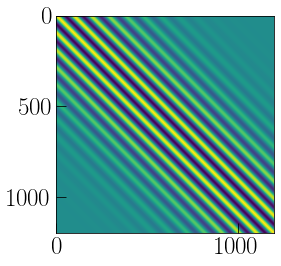

In [25]:
plt.imshow(C)
plt.show()
plt.close()

In [26]:
# Ltry = np.linalg.cholesky(C)

In [27]:
C[0][0]

0.0035738967241392304

In [28]:
err = 1e-8 * np.ones_like(times)
Cplus = C + np.diag(err**2)

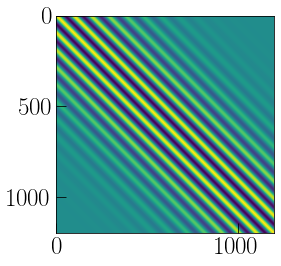

In [29]:
plt.imshow(Cplus)
plt.show()
plt.close()

In [30]:
L = np.linalg.cholesky(Cplus)

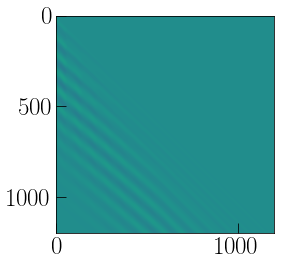

In [31]:
plt.imshow(L)
plt.show()
plt.close()

In [32]:
L.shape

(1200, 1200)

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


fqp =  0.3872308989012594  yr-1; 1/fqp =  2.5824385472270683  d


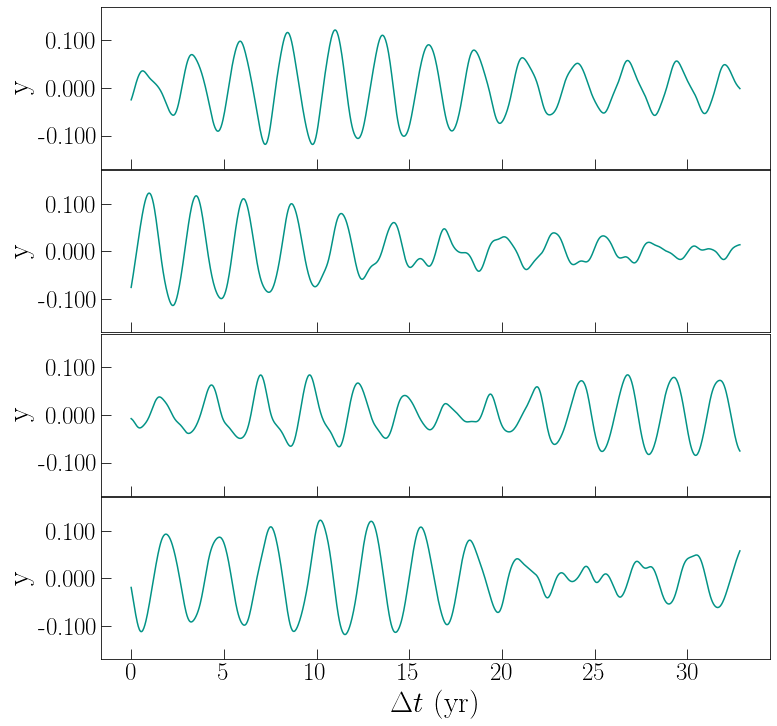

In [82]:
from matplotlib.ticker import FormatStrFormatter
Nsamples=4
fig, axs = plt.subplots(Nsamples, 1, figsize=(12,3*Nsamples), sharex=True, sharey=True, constrained_layout=True)
seeds = [29, 30, 57, 33]
for i in range(Nsamples):
    np.random.seed(seeds[i])
    eps = np.random.normal(loc=0.0, scale=1.0, size=L.shape[1])
    x = L.dot(eps)

    axs[i].plot((times-times[0])/days_per_year, x, c='xkcd:teal')
    axs[i].set_ylabel('y')

    axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axs[i].yaxis.set_label_coords(-0.1, 0.5, transform=axs[i].transAxes)

plt.xlabel('$\Delta t$ (yr)')
plt.subplots_adjust(hspace=0.01)
print('fqp = ',fqp0/2,' yr-1; 1/fqp = ', 2/fqp0, ' d')
plt.ylim([-0.17, 0.17])
plt.savefig('samples_fromFDqp.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()